In [1]:
import pandas
import seaborn

In [2]:
df = pandas.read_pickle("5-value-iterations.pkl.gz")
df

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,...,vi_time,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,time,vi_steady_value
0,ref-fc16,fc16sapirshtein,True,True,True,True,True,bitcoin,6,47,...,0.256362,41.488150,19,19,0.001124,2,0.291043,0.382590,0.258417,37.955464
1,ref-aft20,aft20barzur,True,True,True,True,True,bitcoin,6,37,...,0.194017,40.935026,17,17,0.000691,2,0.170436,0.379228,0.195189,37.484435
2,v1,generic-v1,False,False,True,True,False,bitcoin,6,21327,...,185.291644,39.915645,51,51,0.001204,2,0.122764,0.376756,185.707591,37.418087
3,v1,generic-v1,False,False,True,True,False,ethereum_3,6,32961,...,332.871221,54.587743,358,358,0.010391,2,0.147444,0.517720,333.687045,51.900674
4,v1,generic-v1,False,False,True,True,False,byzantium_3,6,33016,...,261.068513,38.847706,112,112,0.001898,2,0.133738,0.365944,261.818432,36.387480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,v1+fc+n,generic-v1,True,True,True,True,False,byzantium_3,6,572,...,3.553273,49.183393,89,89,0.001489,2,0.187768,0.476153,3.562649,47.188410
92,v1+fc+n,generic-v1,True,True,True,True,False,ghostdag_3,6,604,...,3.088912,43.044988,58,58,0.001210,2,0.195502,0.411071,3.098398,40.498923
93,v1+fc+n,generic-v1,True,True,True,True,False,parallel_3,6,492,...,3.173418,55.061477,112,112,0.001877,2,0.192119,0.543091,3.180918,53.057489
94,v0+fc+n,generic-v0,True,True,True,True,True,bitcoin,6,501,...,4.656467,57.377046,64,64,0.001240,2,0.198653,0.551257,4.665534,54.775965


In [3]:
df.columns

Index(['problem', 'model', 'force_consider_own', 'merge_isomorphic',
       'truncate_common_chain', 'collect_garbage', 'reward_common_chain',
       'protocol', 'dag_size_limit', 'size', 'time_spent', 'rss', 'mdp',
       'horizon', 'alpha', 'gamma', 'vi_discount', 'vi_delta', 'vi_stop_delta',
       'vi_progress', 'vi_iter', 'vi_max_iter', 'vi_time', 'vi_max_value',
       'ss_reachable', 'ss_nonzero', 'ss_time', 'pe_iter', 'ptrev', 'rpp',
       'time', 'vi_steady_value'],
      dtype='object')

In [4]:
dsl = df.dag_size_limit.drop_duplicates()
assert len(dsl) == 1
dag_size_limit = dsl.iloc[0]
dag_size_limit

6

# Reward per progress, source-model, steady state

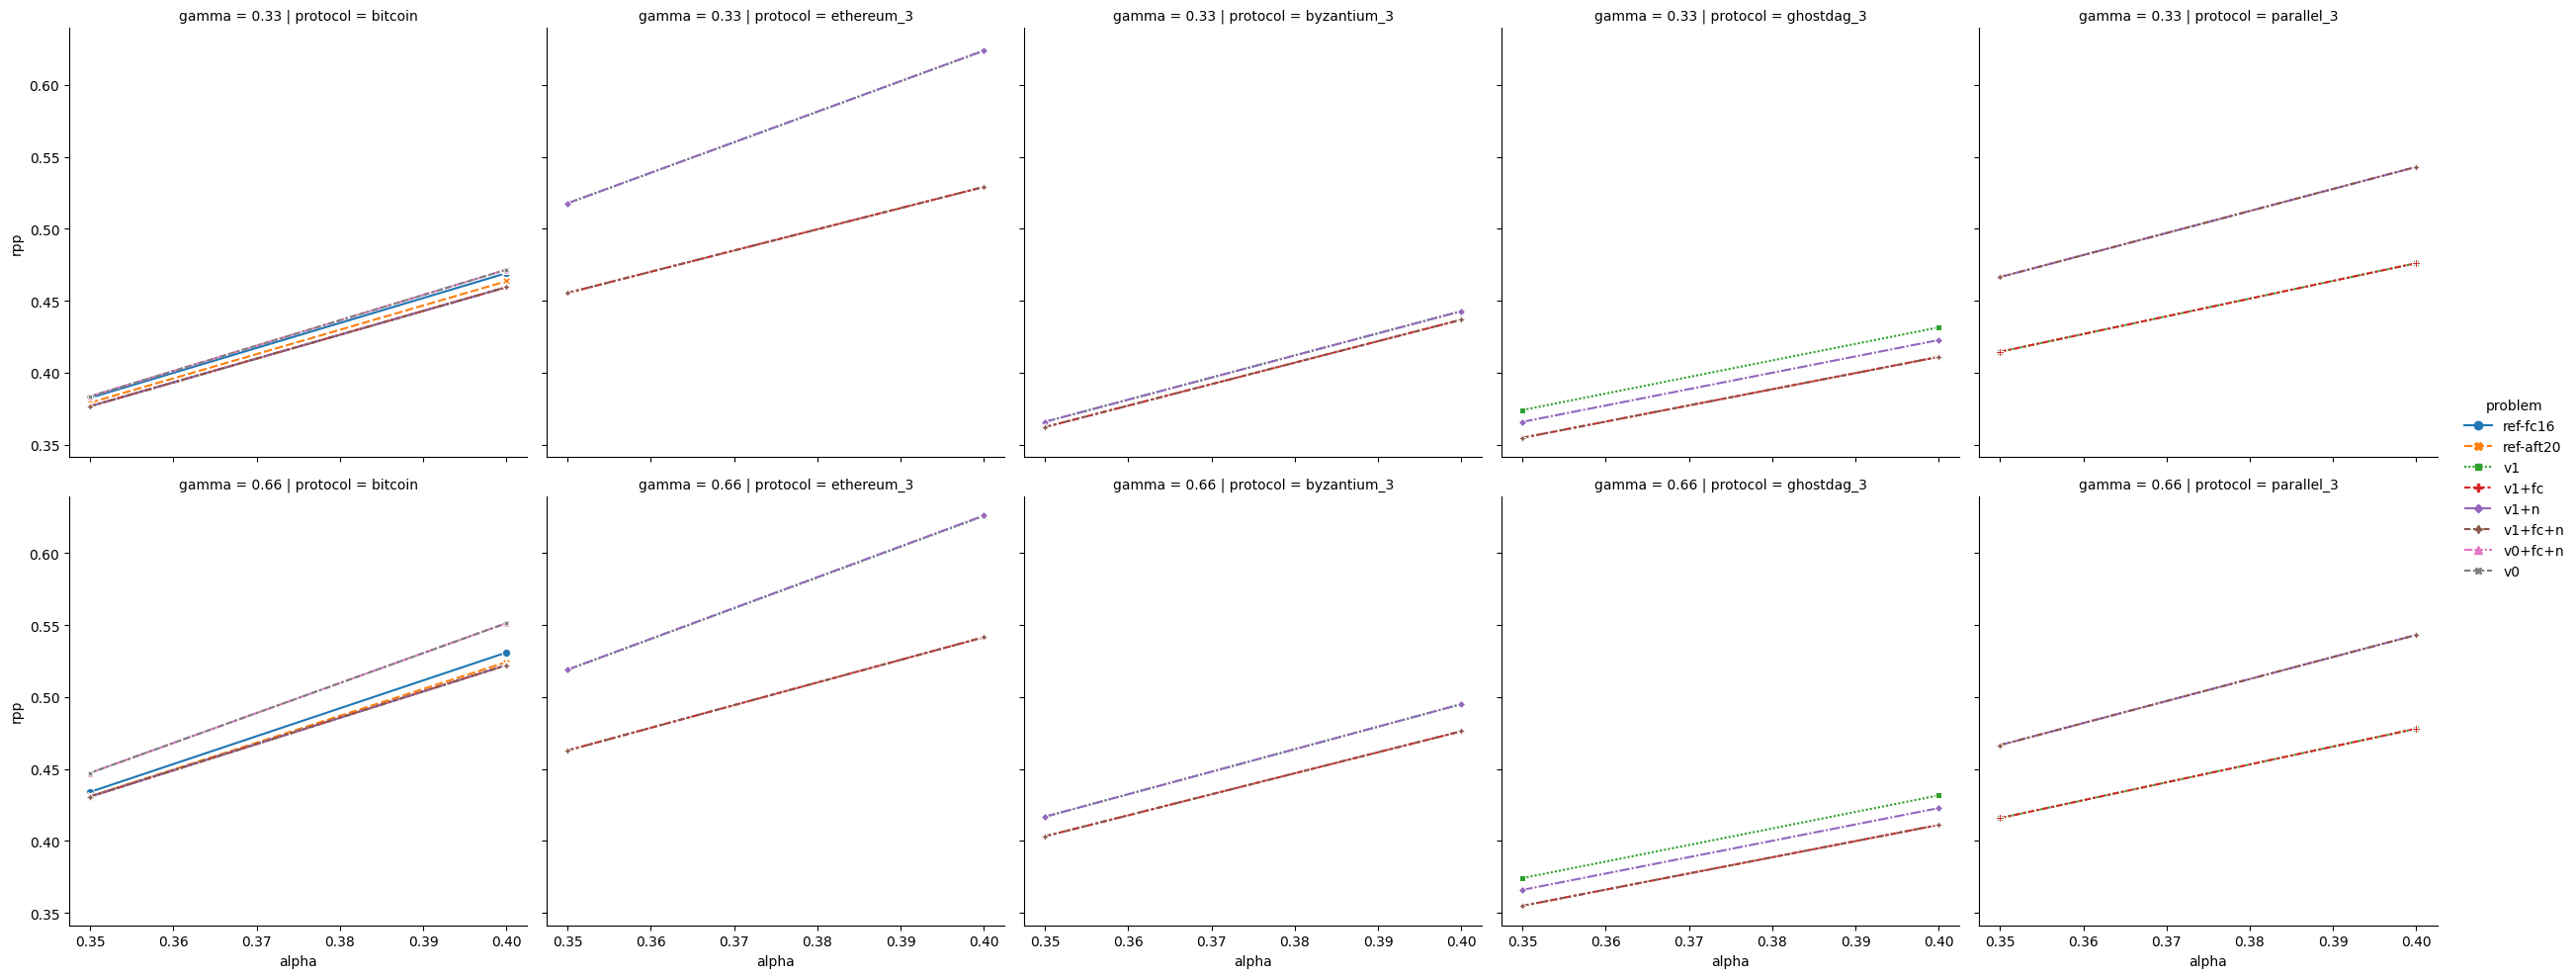

In [5]:
seaborn.relplot(
    data=df,
    kind="line",
    x="alpha",
    y="rpp",
    hue="problem",
    style="problem",
    markers=True,
    col="protocol",
    row="gamma",
)

## Validation v0

The following was lining up perfectly for the first preprint version at maximum fork length = 13

In [6]:
dag_size_limit

6

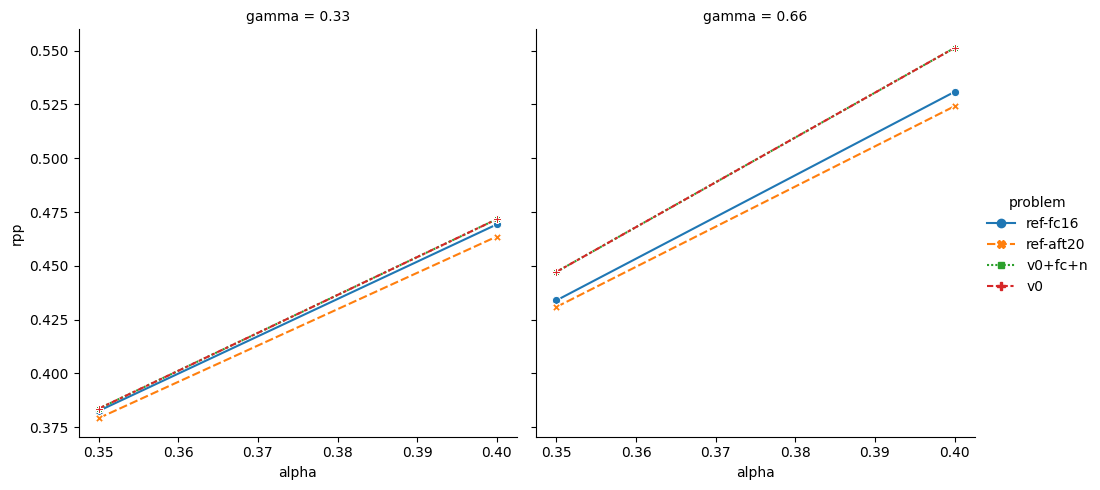

In [7]:
seaborn.relplot(
    data=df.query(
        'protocol == "bitcoin" and (problem.str.startswith("ref") or problem == "v0+fc+n" or problem == "v0")'
    ),
    kind="line",
    x="alpha",
    y="rpp",
    hue="problem",
    style="problem",
    markers=True,
    col="gamma",
)

## Validation v1

The following should line up; I want to claim it in the paper

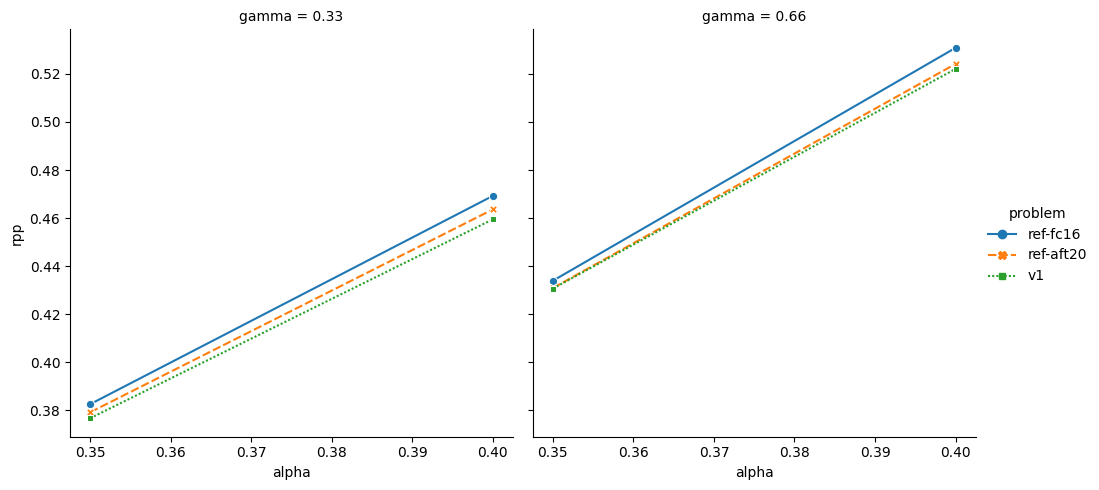

In [8]:
seaborn.relplot(
    data=df.query(
        'protocol == "bitcoin" and (problem.str.startswith("ref") or problem == "v1")'
    ),
    kind="line",
    x="alpha",
    y="rpp",
    hue="problem",
    style="problem",
    markers=True,
    col="gamma",
)

## H: v1 optimizations are neutral for all protocols

No. Exceptions:
- In Ethereum and Byzantium force-consider restricts the attacker. The optimal policy ignores some own blocks.
- In Parallel, canonization seems to enable attacks. I have no glue how this can be.
- In Ghostdag, canonization seems to mitigate attacks. I have no glue how this can be.
- In Ghostdag, canonization causes a split such that force-consider mitigates attacks. I have no glue how this can be.

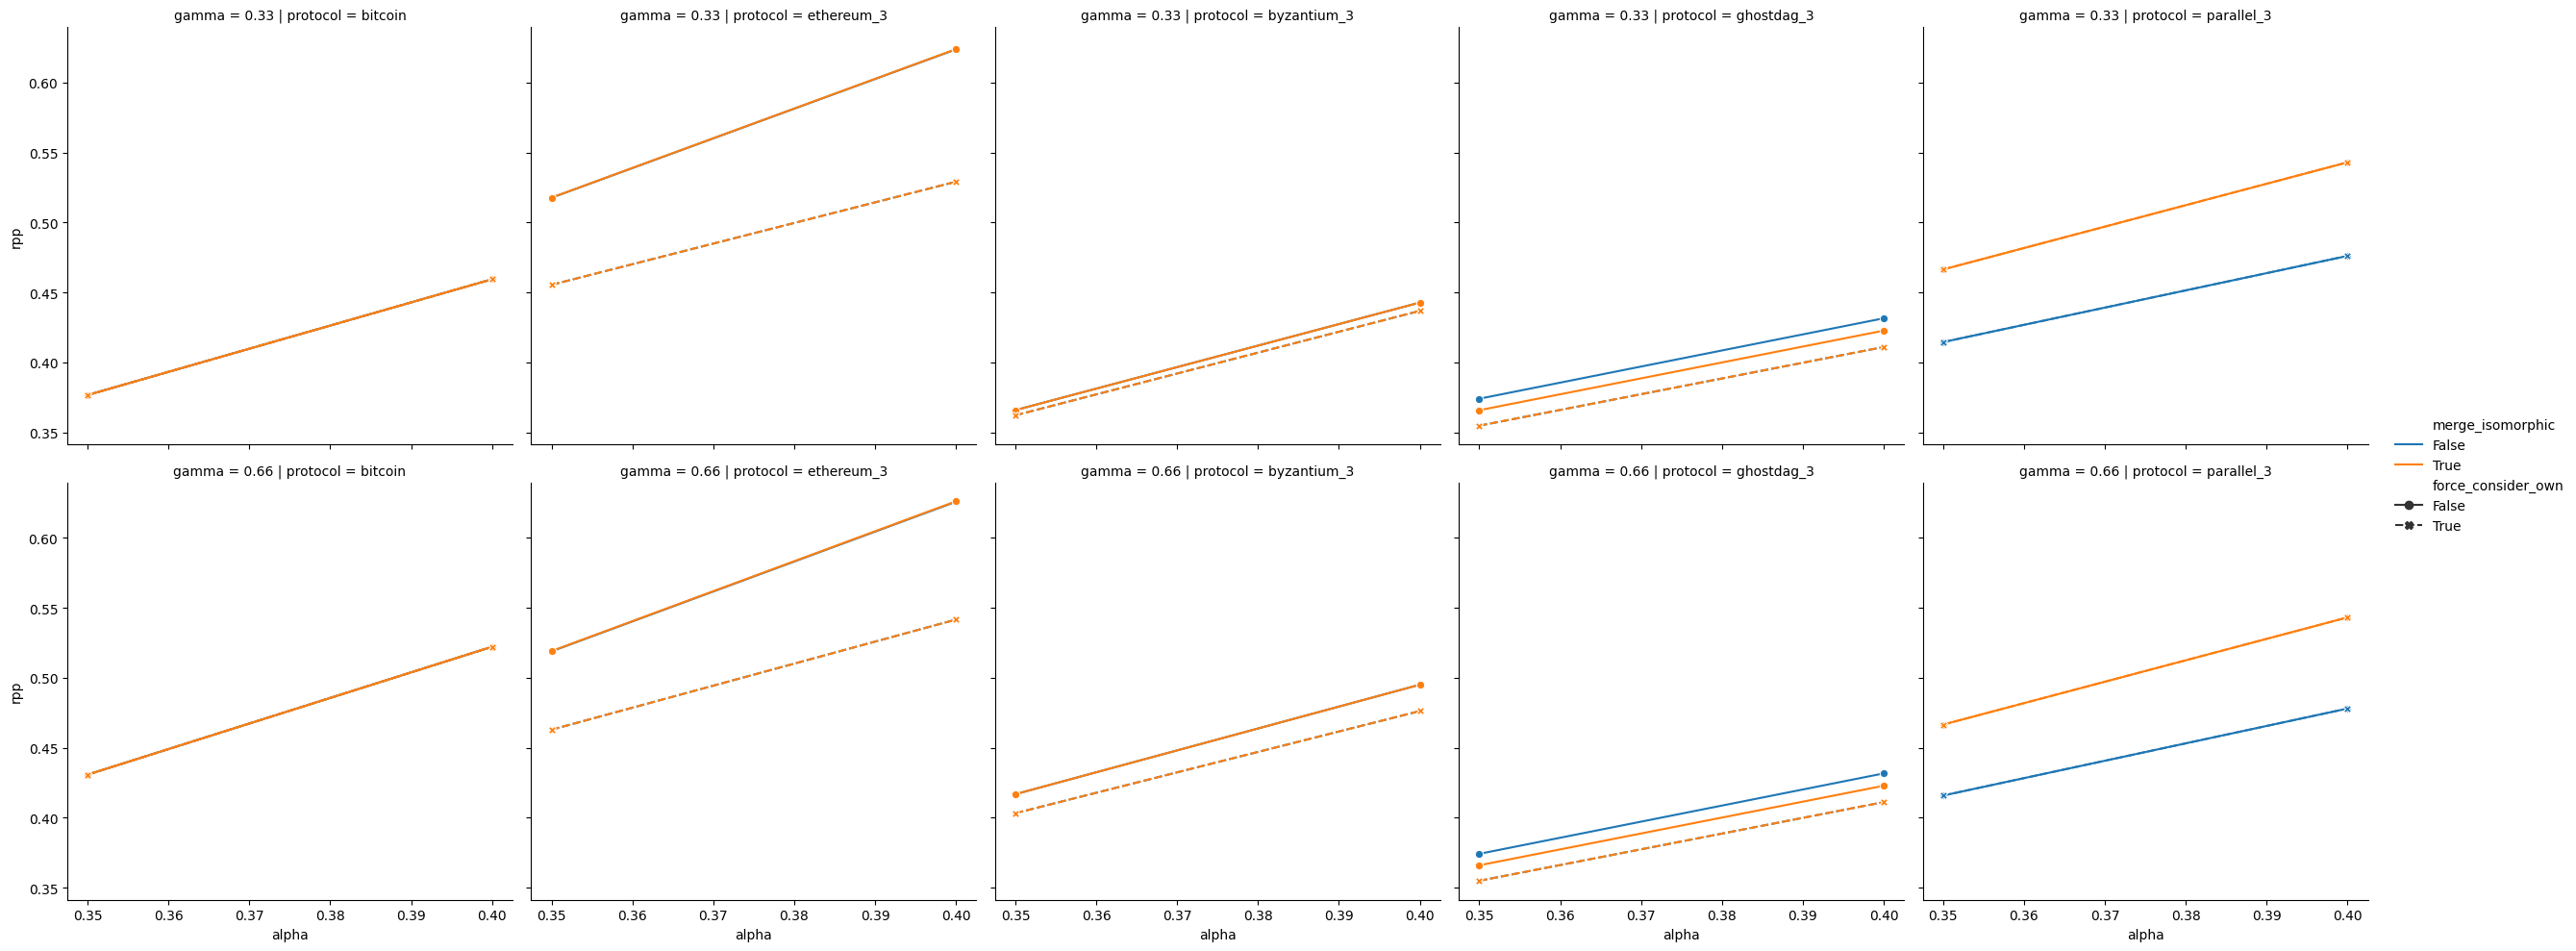

In [9]:
seaborn.relplot(
    data=df.query('problem.str.startswith("v1")'),
    kind="line",
    x="alpha",
    y="rpp",
    style="force_consider_own",
    hue="merge_isomorphic",
    markers=True,
    col="protocol",
    row="gamma",
)